# AgCl with Br error plot


In [19]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-22);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
%available_graphics_toolkits()
%loaded_graphics_toolkits

In [20]:
%equilibrium problem
AgT=1e-6; BrT=1e-5; pH=7;  pe=20.75-pH; logClT=-6:0.1:-1; ClT=10.^logClT;

In [21]:
% MODEL USING PHREEQC

for i=1:length(ClT)

minerals=[{'AgBrs'};{'AgCls'}]; totalvector=[AgT; BrT; ClT(i); ClT(i)+BrT]; totalnames=[{'Ag'}; {'Br'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'};{'Br-'};{'Cl-'};{'AgBr'};{'AgBr2-'};{'AgBr3-2'};{'AgBr4-3'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'}];
%database=['llnl_nosolubleAgCl.dat']; 
acid=['NaOH']; show=1; T=25;
%database=['AgCl.dat']; 
database=['complexAgClBr.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

AgPHREEQC(i)=solutionspeciesconcs(1); 
BrPHREEQC(i)=solutionspeciesconcs(2); 
ClPHREEQC(i)=solutionspeciesconcs(3);
AgBrPHREEQC(i)=solutionspeciesconcs(4); 
AgBr2PHREEQC(i)=solutionspeciesconcs(5);
AgBr3PHREEQC(i)=solutionspeciesconcs(6);
AgBr4PHREEQC(i)=solutionspeciesconcs(7);
AgClPHREEQC(i)=solutionspeciesconcs(8);
AgCl2PHREEQC(i)=solutionspeciesconcs(9);
AgCl3PHREEQC(i)=solutionspeciesconcs(10);
AgCl4PHREEQC(i)=solutionspeciesconcs(11);
AgBrsPHREEQC(i)=solidconcs(1);
AgClsPHREEQC(i)=solidconcs(2);

AgmasserrorPHREEQC(i)=AgT-AgPHREEQC(i)-AgBrsPHREEQC(i)-AgBrPHREEQC(i)-AgBr2PHREEQC(i)-AgBr3PHREEQC(i)-AgBr4PHREEQC(i)-AgClsPHREEQC(i)-AgClPHREEQC(i)-AgCl2PHREEQC(i)-AgCl3PHREEQC(i)-AgCl4PHREEQC(i);
BrmasserrorPHREEQC(i)=BrT-BrPHREEQC(i)-AgBrsPHREEQC(i)-AgBrPHREEQC(i)-2*AgBr2PHREEQC(i)-3*AgBr3PHREEQC(i)-4*AgBr4PHREEQC(i);
ClmasserrorPHREEQC(i)=ClT(i)-ClPHREEQC(i)-AgClsPHREEQC(i)-AgClPHREEQC(i)-2*AgCl2PHREEQC(i)-3*AgCl3PHREEQC(i)-4*AgCl4PHREEQC(i);
end

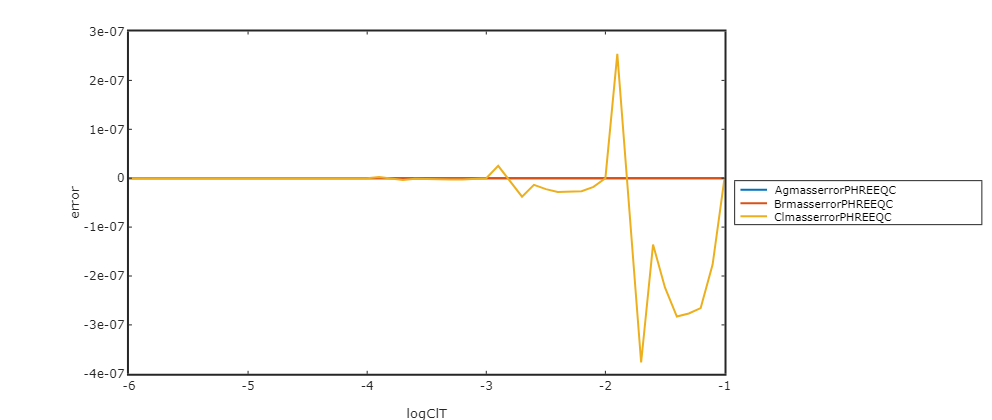

In [22]:
% plot PHREEQC error
h=plot(logClT,AgmasserrorPHREEQC,logClT,BrmasserrorPHREEQC,logClT,ClmasserrorPHREEQC,'linewidth',2);

set(h,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('logClT'); ylabel('error')
legend('AgmasserrorPHREEQC','BrmasserrorPHREEQC','ClmasserrorPHREEQC','location','eastoutside')
%set(h(1),'markerfacecolor','b')
% export what we want to plot in excel

output=[...
logClT' AgmasserrorPHREEQC' BrmasserrorPHREEQC' ClmasserrorPHREEQC'
];


In [23]:
% MODEL USING TABLEAU (different gradients or log versus linear variables)
%graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=1; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
%database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

for i=1:length(ClT)

TOTALS=[AgT BrT ClT(i)]';
TOTALS(TOTALS==0)=1e-16;% get rid of zero values, b/c div by zero error
%TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

tic;
[Ag,Br,Cl,AgBrs,AgCls,MASSERR]=AgClBrtableaumorecomplex(pH,pe,TOTALS,flag1,flag2,flag3,flag4,flag5);
%[Ag,Br,Cl,AgBrs,AgCls,MASSERR]=AgClBrtableaumorecomplex(pH,pe,1,flag1,flag2,flag3,flag4,flag5);
%[Ag]=AgClBrtableaumorecomplex(pH,pe,TOTALS,flag1,flag2,flag3,flag4,flag5)
tableautime=toc;

Agmasserror(i)=MASSERR(1); Brmasserror(i)=MASSERR(2); Clmasserror(i)=MASSERR(3);

end

X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER EXEED no solid logX
X no ITER 

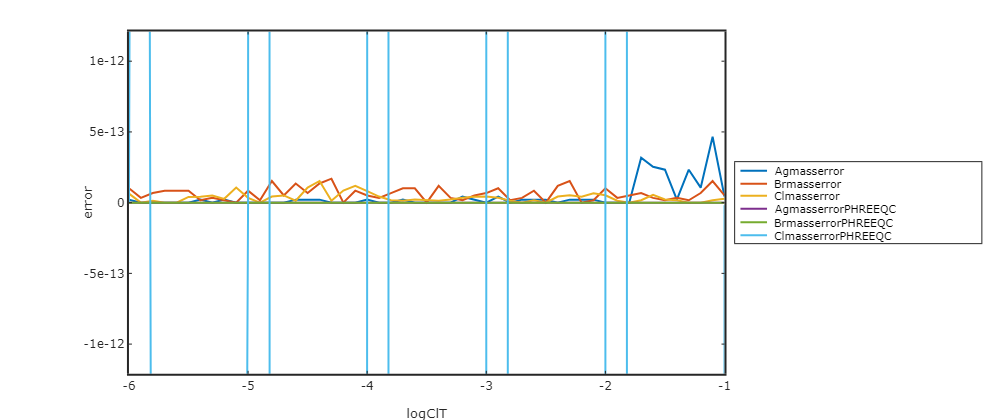

In [24]:
h=plot(logClT,Agmasserror,logClT,Brmasserror,logClT,Clmasserror,logClT,AgmasserrorPHREEQC,logClT,BrmasserrorPHREEQC,logClT,ClmasserrorPHREEQC);
set(h,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('logClT'); ylabel('error')
legend('Agmasserror','Brmasserror','Clmasserror','AgmasserrorPHREEQC','BrmasserrorPHREEQC','ClmasserrorPHREEQC','location','eastoutside')

axis([-6 -1 -1e-12 1e-12])



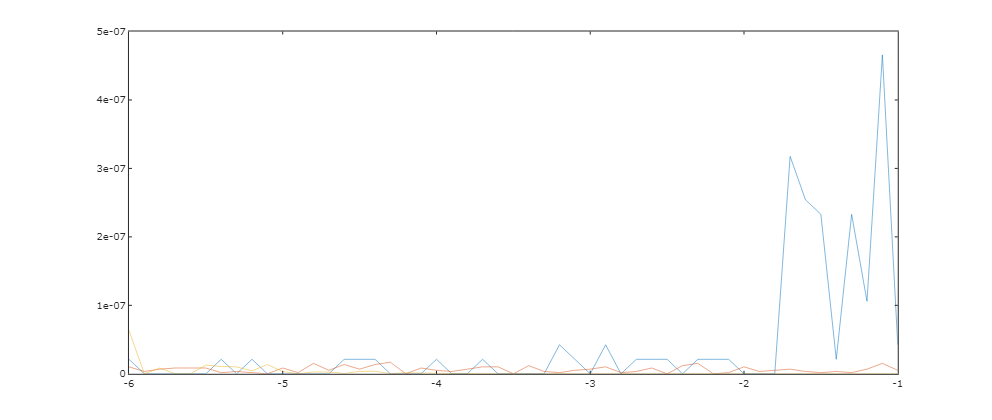

In [25]:
h=plot(logClT,Agmasserror./AgT,logClT,Brmasserror./BrT,logClT,Clmasserror./ClT);

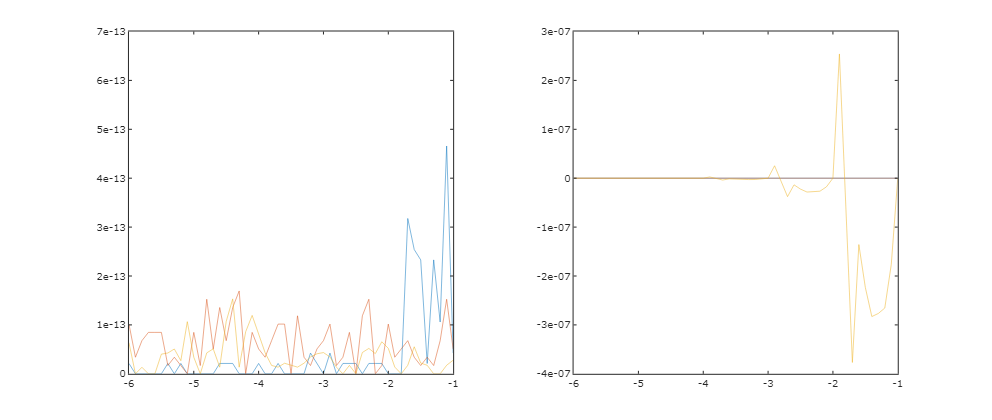

h,1
1,-970.67
2,-974.178
3,-975.12


In [26]:
subplot(121)
h=plot(logClT,Agmasserror,logClT,Brmasserror,logClT,Clmasserror);

subplot(122)
h=plot(logClT,AgmasserrorPHREEQC,logClT,BrmasserrorPHREEQC,logClT,ClmasserrorPHREEQC);